In [1]:
import torch, clip, pandas as pd
from PIL import Image
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

df = pd.read_csv("data/flickr30k/cleaned_captions.csv").sample(5)
img_dir = Path("data/flickr30k/cleaned_images")

for _, row in df.iterrows():
    img = preprocess(Image.open(img_dir / row["image"])).unsqueeze(0).to(device)
    text = clip.tokenize([row["caption"]]).to(device)
    with torch.no_grad():
        img_feat = model.encode_image(img)
        txt_feat = model.encode_text(text)
        sim = torch.cosine_similarity(img_feat, txt_feat).item()
    print(f"{row['image']}: {row['caption']} → Similarity: {sim:.3f}")


/Users/rutujajadhav/Generative Project/venv/lib/python3.12/site-packages/clip/clip.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging
/Users/rutujajadhav/Generative Project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


3493255026.jpg: a white and brown dog is playing tug-of-war . → Similarity: 0.310
3213992947.jpg: a woman in a puffy red jacket poses for a picture at an ice skating rink . → Similarity: 0.293
16639719.jpg: a group of people camping out surrounding a fire pit , some are sitting in chairs others on the ground , and one is poking the fire in a nightly and dark surrounding . → Similarity: 0.334
2663272259.jpg: a little boy in a black vest is holding two tusks up to his cheeks , pretending to be some sort of animal . → Similarity: 0.311
387466573.jpg: a man on a bicycle is outside a bicycle shop near a row of bikes . → Similarity: 0.288


100%|██████████| 50/50 [11:33<00:00, 13.88s/it]


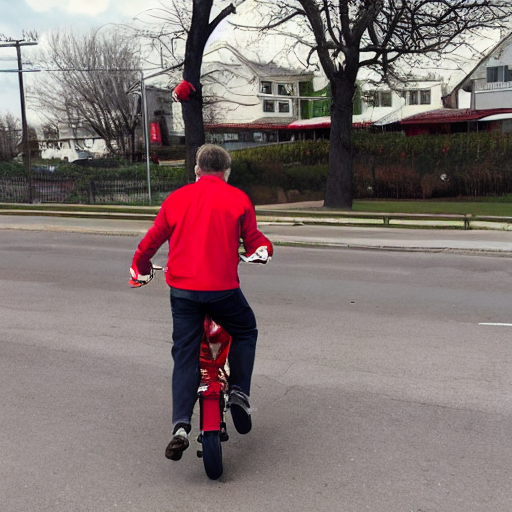

100%|██████████| 50/50 [11:15<00:00, 13.52s/it]


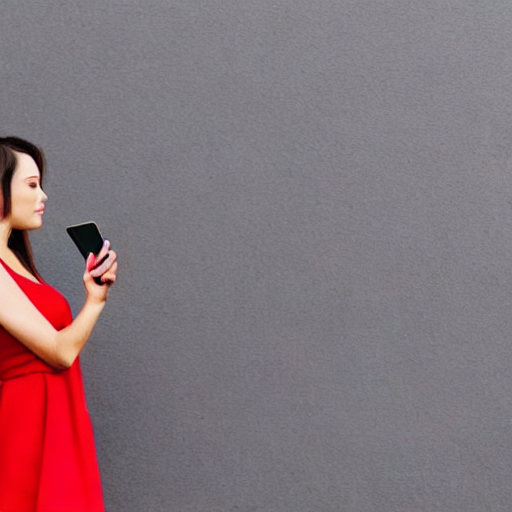

100%|██████████| 50/50 [12:59<00:00, 15.59s/it]


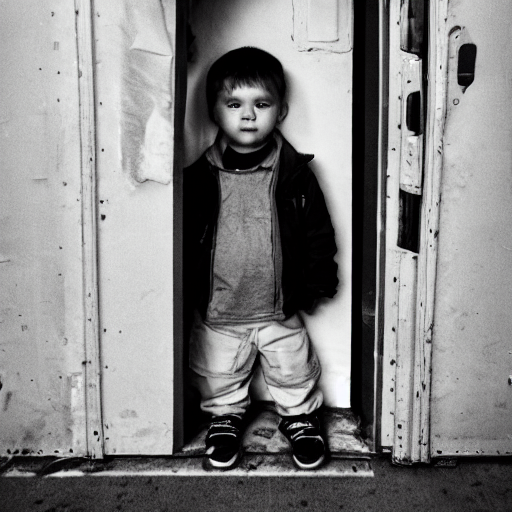

100%|██████████| 50/50 [13:01<00:00, 15.63s/it]


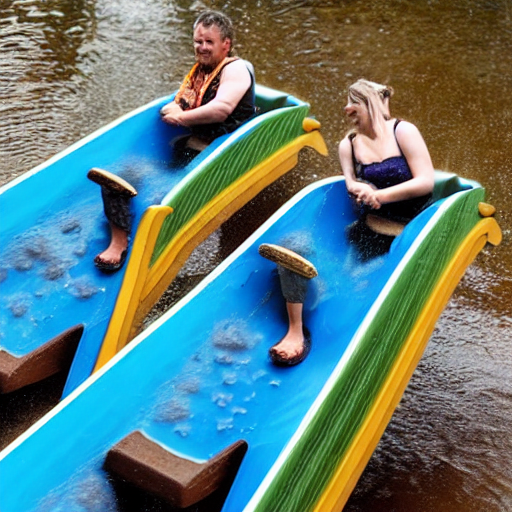

100%|██████████| 50/50 [13:20<00:00, 16.00s/it]


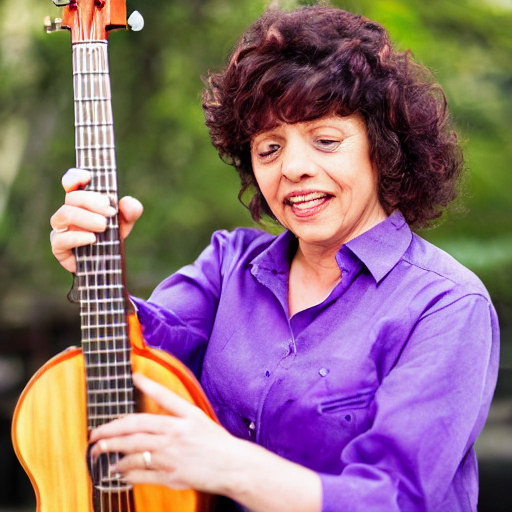

In [4]:
from diffusers import StableDiffusionPipeline
import torch, os
from IPython.display import display

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cpu")
pipe.enable_attention_slicing()

# Make sure the folder exists
os.makedirs("outputs", exist_ok=True)

prompts = [
    "a man on a red bike popping a wheelie",
    "a woman in a red dress looking at her cellphone",
    "a little boy standing in the doorway of a van",
    "two people riding a log flume in a theme park",
    "a woman in a purple shirt playing an instrument"
]

for prompt in prompts:
    image = pipe(prompt).images[0]
    image.save(f"outputs/{prompt[:15].replace(' ', '_')}.png")
    display(image)
